# Iris Flower Classification

# <!-- Context
# The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species. -->

# **Project Work flow**
---

1. **Importing Libraries**

2. **Loading the Dataset**

3. **Exploratory Data Analysis**

4. **Data Wrangling**

5. **Splitting the data and Standardization**

6. **Fitting models**

7. **Model Explainability**

8. **Conclusion**

# **1. Importing Libraries**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **2. Loading the dataset**

In [2]:
df=pd.read_csv(r"C:\Users\sajal\Downloads\archive (5).zip")

# **3. Exploratory Data Analysis**

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [45]:
df.drop(['Id'], axis=1,inplace=True)

In [11]:
df.shape

(150, 6)

In [38]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


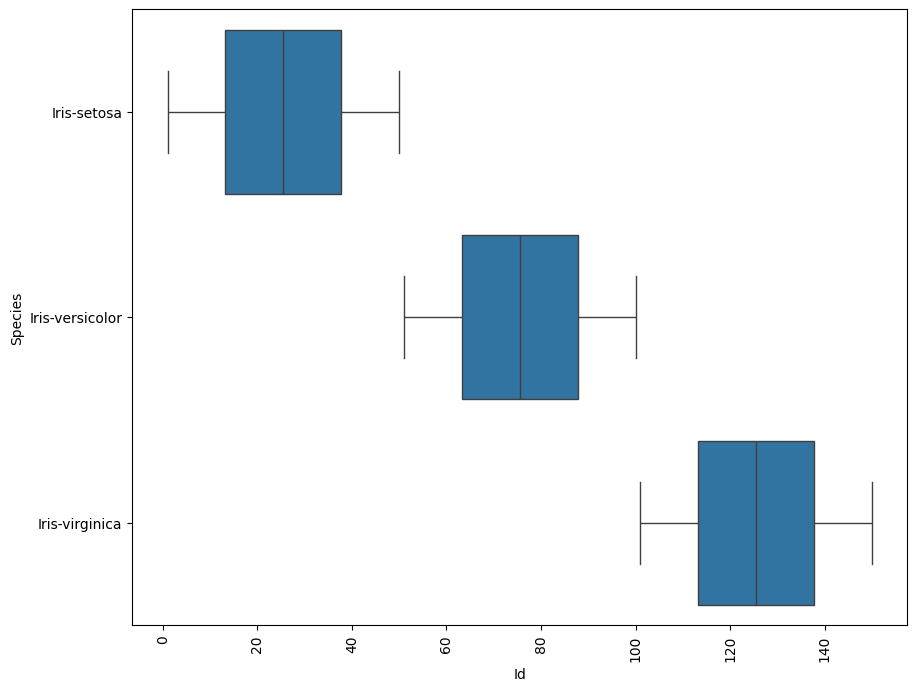

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Id',y='Species')
plt.xticks(rotation=90)
plt.show()

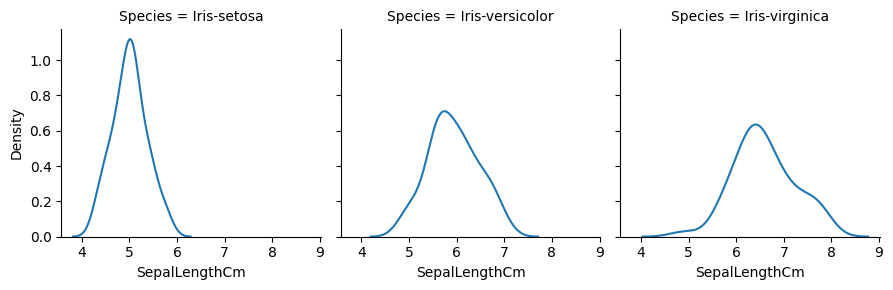

In [31]:
g = sns.FacetGrid(df, col='Species')
g = g.map(sns.kdeplot, 'SepalLengthCm')

Text(0.5, 1.0, 'Count of Species')

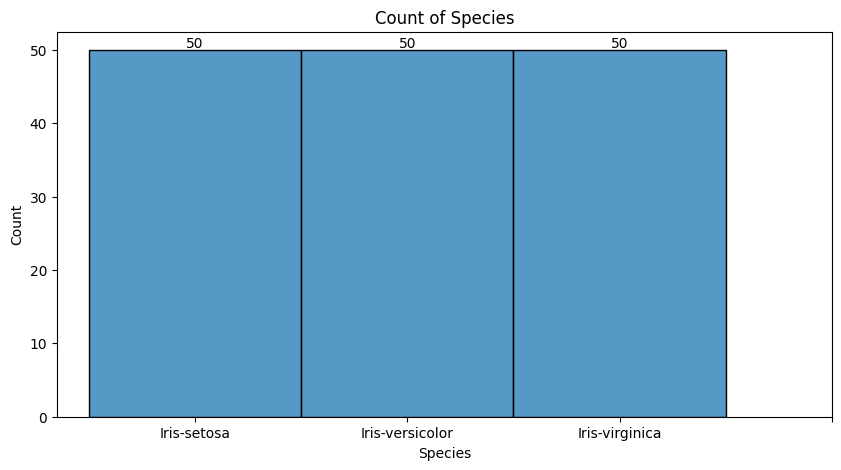

In [65]:
# Histplot to show the count of all categories

plt.figure(figsize=(10,5))
xtick=[0,1,2,3]
sns.histplot(data=df['Species'])
ax = plt.gca()

# Annotate each bin with its count
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.text(x, y, f'{int(y)}', ha='center', va='bottom')
plt.xticks(xtick)
plt.title('Count of Species')

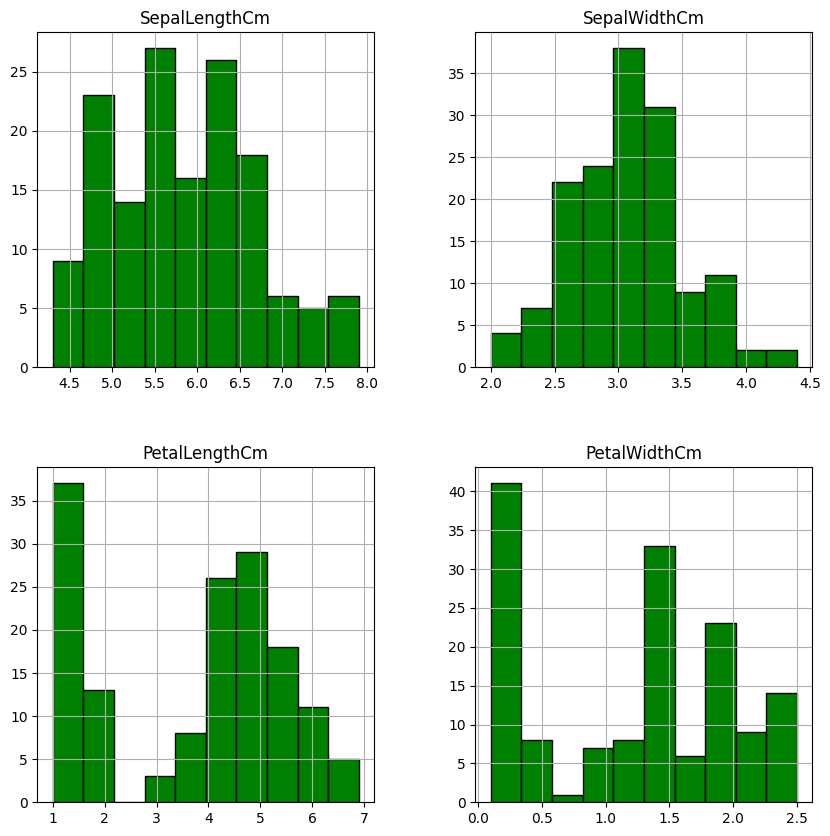

In [47]:
df.hist(color= 'green' ,edgecolor='black',figsize=(10,10))
plt.show()

In [51]:
cat_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['float64','int64'])

In [52]:
from scipy.stats import skew

SepalLengthCm
0.3117530585022963


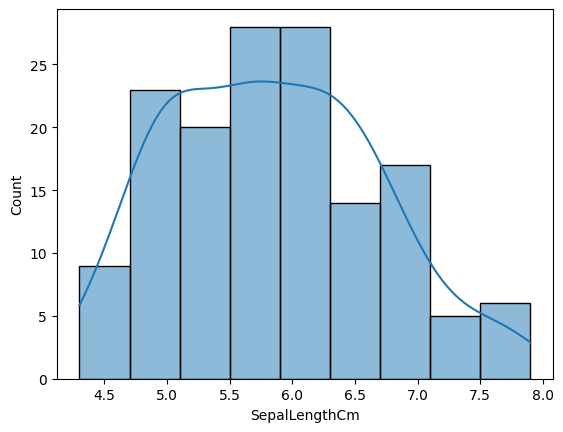

SepalWidthCm
0.330702812773315


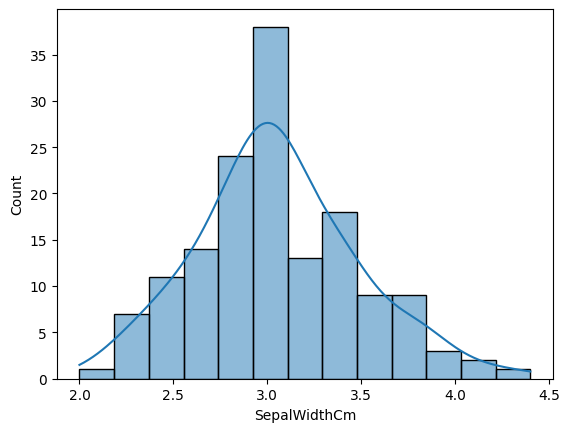

PetalLengthCm
-0.2717119501716388


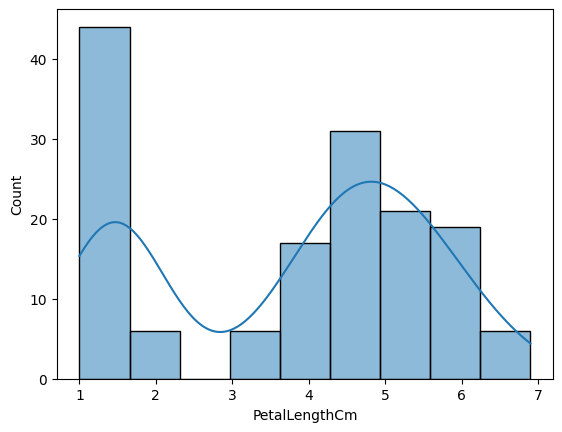

PetalWidthCm
-0.10394366626751729


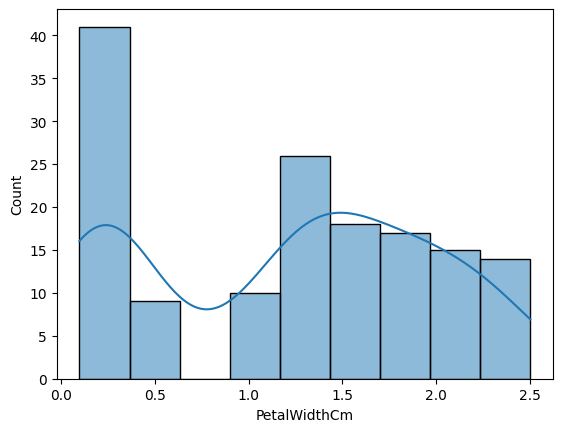

In [53]:
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

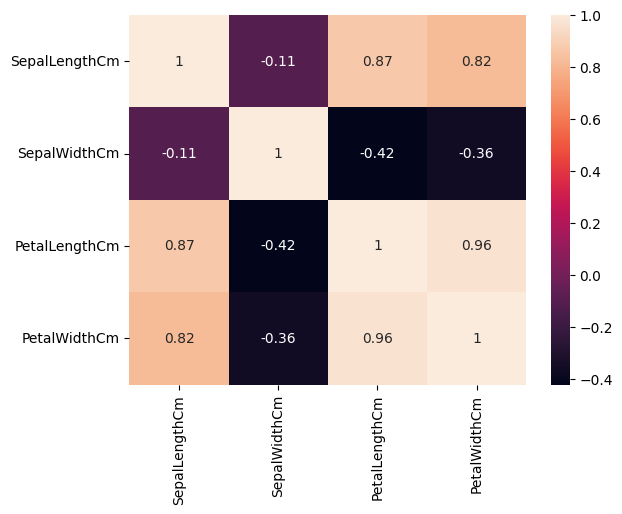

In [54]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

In [57]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [59]:
x = df.drop('Species', axis=1)
y= df.Species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

# Machine Learning

# K Neighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.9666666666666667

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


# SVM

In [62]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

0.9833333333333333

# DecisionTreeClassifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)

0.9333333333333333

# Conclusion

### Thats it! We have come to an end of our long exercise. Throughout the analysis we went through various steps to determine our predictions for the Iris Flower . We started with simple EDA where we analysed our dependent variable as well as other independent variables. We found out the correlation, count, relationships with the dependent variable. We looked for missing values and outliers and did some feature modifications.
--------------------------------------------------------------------------------
### Finally we implemented 4 machine learning algorithms namely; KNeighborsClassifier,ogisticRegression,SVM,DecisionTreeClassifier
-------------------------------------------------------------------------------
### The accuracy of our best model was 0.98 and 0.97 for training and test set respectively. Although, the difference is still 1, considering the simplicity and less no. of observations, this can be considered a good model. Performance can be improved even further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and become less prone to overfitting. With evolution of new technology, these numbers can change in future hence there will always be a need to check on the model from time to time.